# Homework #3 

> Choose 9 stocks of your choice and create a notebook with the same visualizations. Provide similar explanation in regards to the meaning of statistics and the shape of each stocks distribution.

### 9 Stocks 
* TREX
* STMP
* ENPH
* IPGP
* NICE
* TNC
* MANH
* CYBR
* VOO

> These are the companies that the Fund is currently manaing.

In [1]:
# Here is the code for creating the statistics I am tracking for my companies

# this is the total number of observations
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

# Finds the average for each data set
def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_ 

# find the median of each data set
def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1]) 
    return median_

#Find the mode of each data set
def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_

# Finds the variaence of each data set
def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    return variance_

# Finds the Standerd Deviation of each data set
def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

# FInds the covariance of each of data set
def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)

# Finds the correlation of each data set
def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

# Finds the skewness of the data set
def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    # insert variables into formula
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
    return skew

#Finds the Kurtosis of each data set
def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    return kurt

In [4]:
# This summarizes the statistics we are tracking
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)  
    return stats_df

### Statistics Meaning 
> Mean | is the average. It is the sum / n

> Median | is the number in the middle of n

> Variance | is the distribution of n, it explains how random variables differ from expected

> S.D. | measures the volatility of a data set, it is the square root of the variance

> Skewness | refers to the distortion of normal distrinbution in a data set. It describes the appeanance.

> Kurtosis | describes the weight of a distribution that is held in the tails.

In [3]:
# This is a template we loaded to graph and summarize data
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()

# Creating a dictionary for our data
data_dict = {}
stocks = ["TREX", "STMP", "ENPH", "IPGP", "NICE", "TNC", "MANH", "CYBR", "VOO"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [4]:
# This is summarizing the closing price of the stocks we are tracking in our dictionary into a table
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data

,TREX,STMP,ENPH,IPGP,NICE,TNC,MANH,CYBR,VOO
Date,,,,,,,,,
2012-01-03,2.882500,26.260000,NaN,35.330002,34.630001,39.750000,10.095000,NaN,116.599998
2012-01-04,2.903750,25.570000,NaN,35.930000,34.000000,40.020000,9.942500,NaN,116.800003
2012-01-05,2.923750,25.580000,NaN,37.970001,34.669998,40.720001,9.990000,NaN,117.180000
2012-01-06,2.887500,25.790001,NaN,38.759998,34.450001,39.360001,9.975000,NaN,116.940002
2012-01-09,2.878750,25.100000,NaN,39.419998,34.220001,37.790001,10.030000,NaN,117.120003
...,...,...,...,...,...,...,...,...,...
2020-09-14,69.949997,217.009995,69.489998,162.880005,212.250000,62.959999,94.790001,98.019997,310.970001
2020-09-15,69.879997,213.399994,72.160004,166.210007,214.539993,61.810001,96.250000,103.290001,312.570007
2020-09-16,70.110001,215.000000,72.830002,168.369995,216.919998,63.270000,96.860001,101.169998,311.309998


In [5]:
# this command is showing the statistics of the stocks we are following in our dictionary 
price_change_data = close_data.pct_change() * 100
stats_df = gather_statistics(price_change_data)
stats_df

,TREX,STMP,ENPH,IPGP,NICE,TNC,MANH,CYBR,VOO
mean,0.181,0.182,0.251,0.104,0.095,0.041,0.129,0.128,0.049
median,0.159,0.096,0.000,0.152,0.075,0.078,0.157,0.136,0.063
variance,7.792,15.809,29.553,6.502,2.278,3.810,5.340,9.988,1.102
S.D.,2.792,3.976,5.436,2.550,1.509,1.952,2.311,3.160,1.050
skewness,-0.014,0.093,0.003,-0.001,0.001,0.002,-0.000,-0.000,-0.001
kurtosis,17.304,85.463,11.068,16.579,14.736,9.637,18.086,12.169,24.356


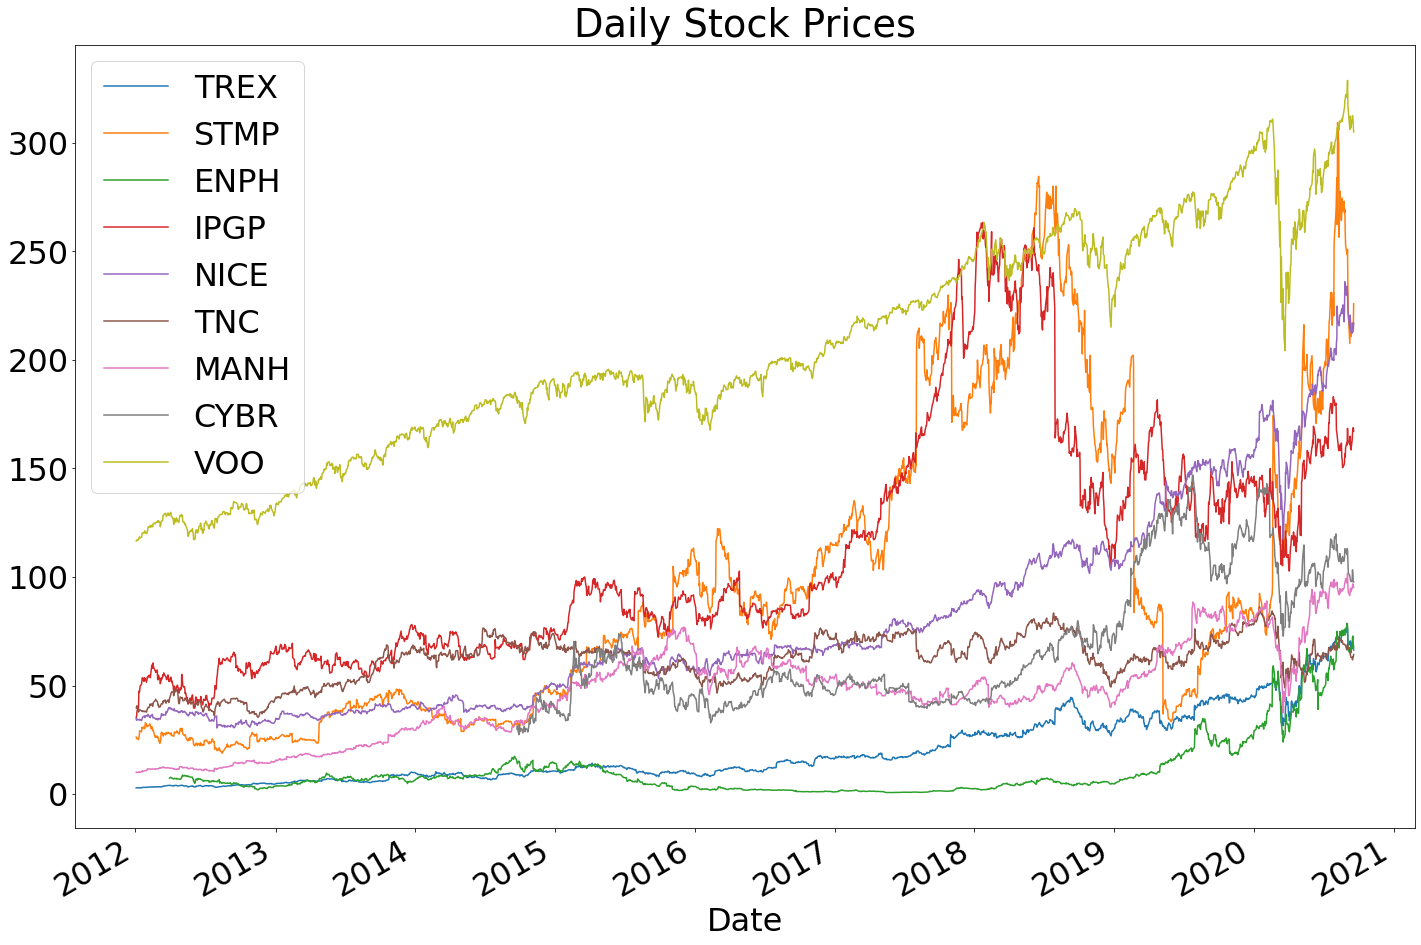

In [6]:
# We are importing a table
import matplotlib.pyplot as plt
# demensions of the table
plt.rcParams.update({'font.size': 32})
# size of the table
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# Creating the title
plt.title("Daily Stock Prices")
plt.show()
plt.close()

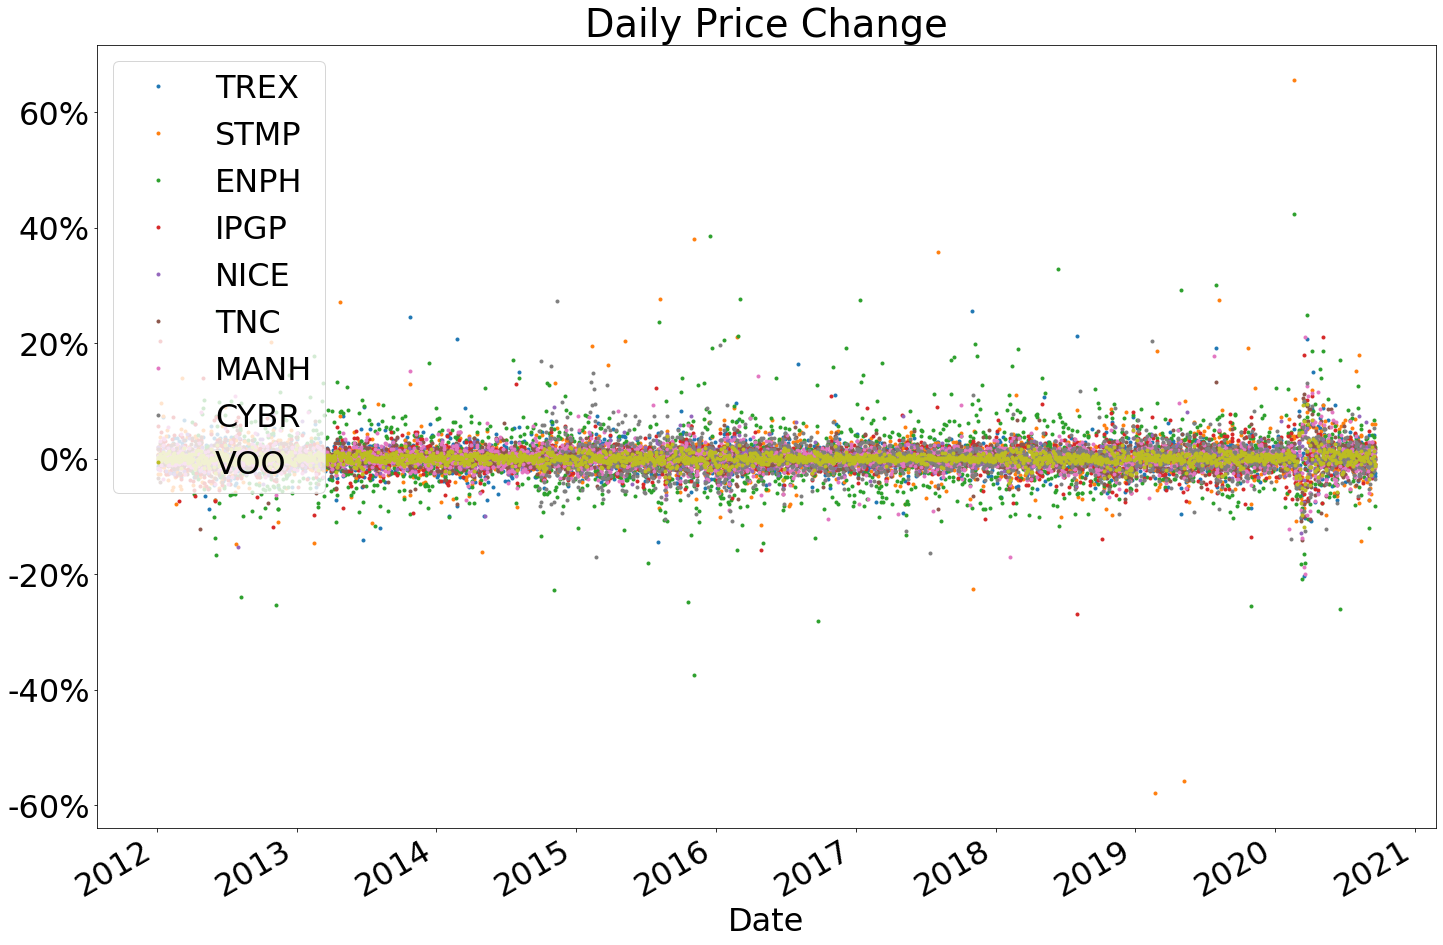

In [7]:
# Creating a different image to visualize our holdings
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:

    price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
# This is plotting out legend in the image
plt.legend()
# Title of graph
plt.title("Daily Price Change")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

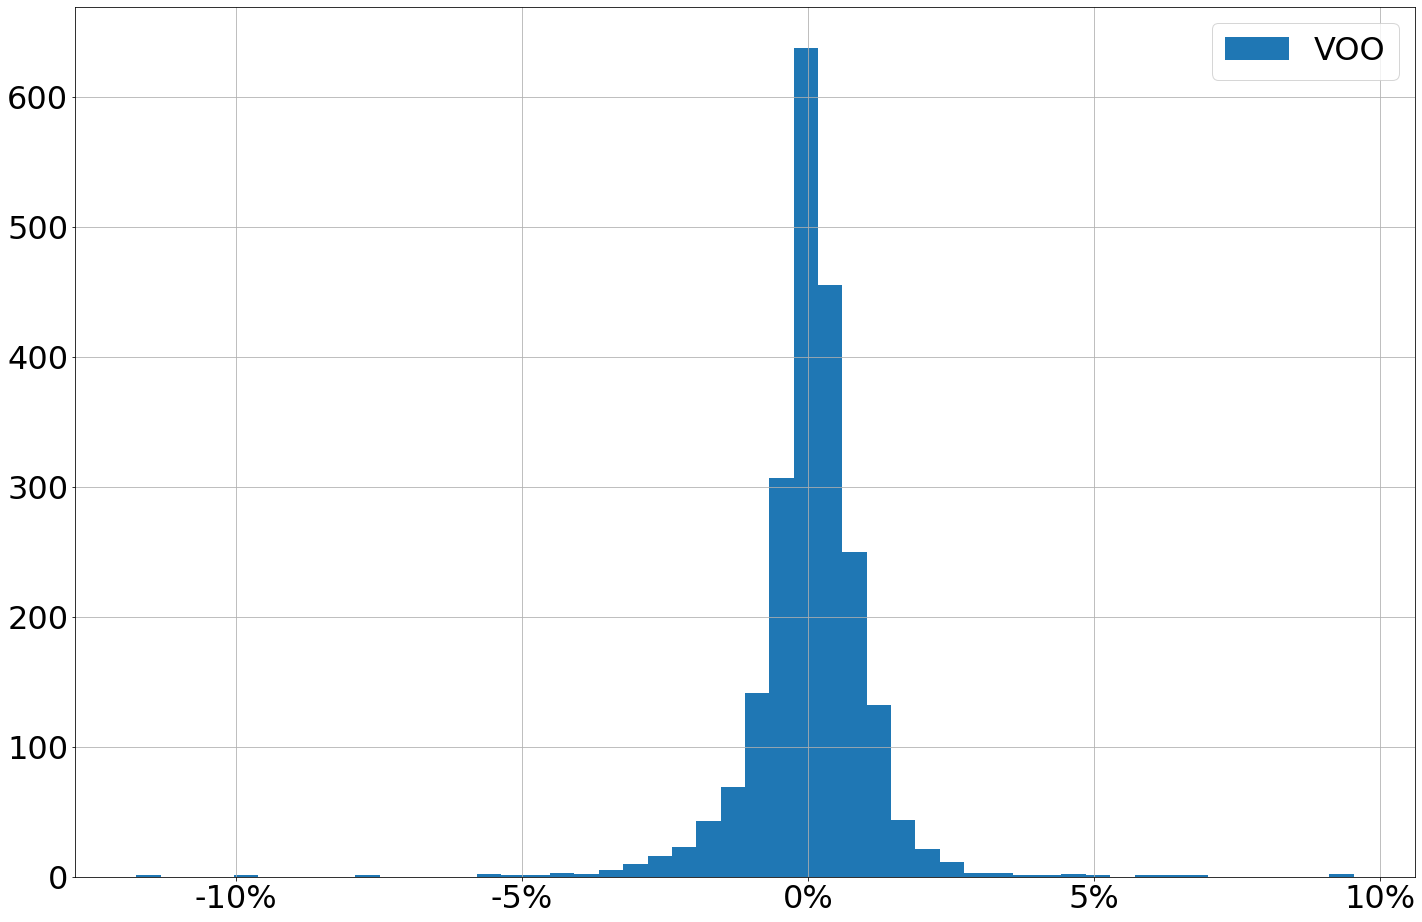

In [8]:
# THis is plotting the deviation of based off of price
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["VOO"].hist(bins = 50, label = "VOO")
# Getting rid of the tick marks
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
# Plotting the legend
plt.legend()

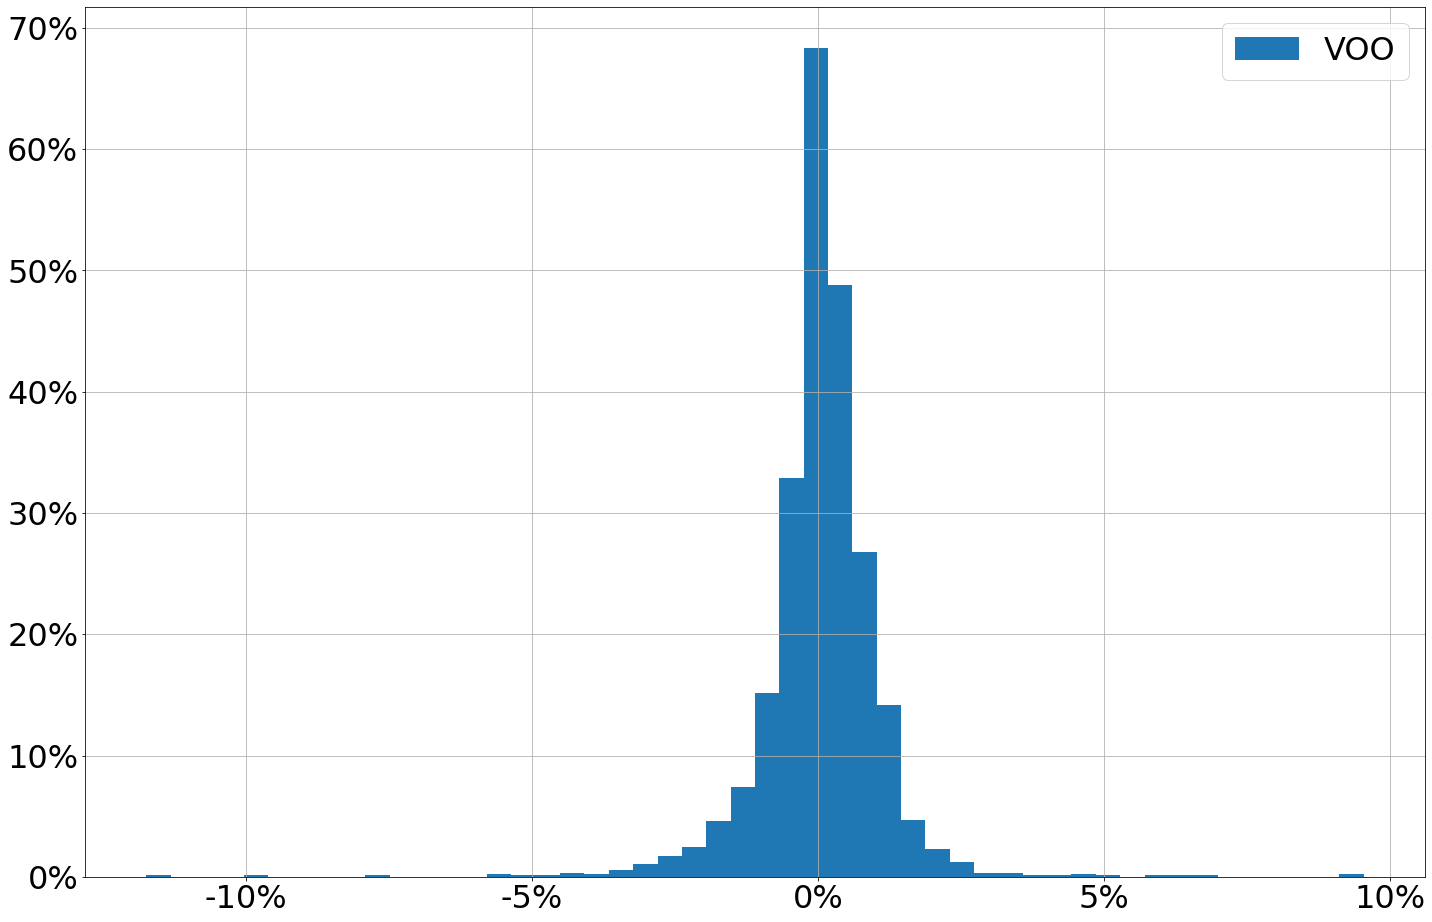

In [9]:
# Another image for visualizing our holdings
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["VOO"].hist(bins = 50, label = "VOO", density = True)
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals]) 
# Getting rid of the tick marks
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Plotting the legend
plt.legend()

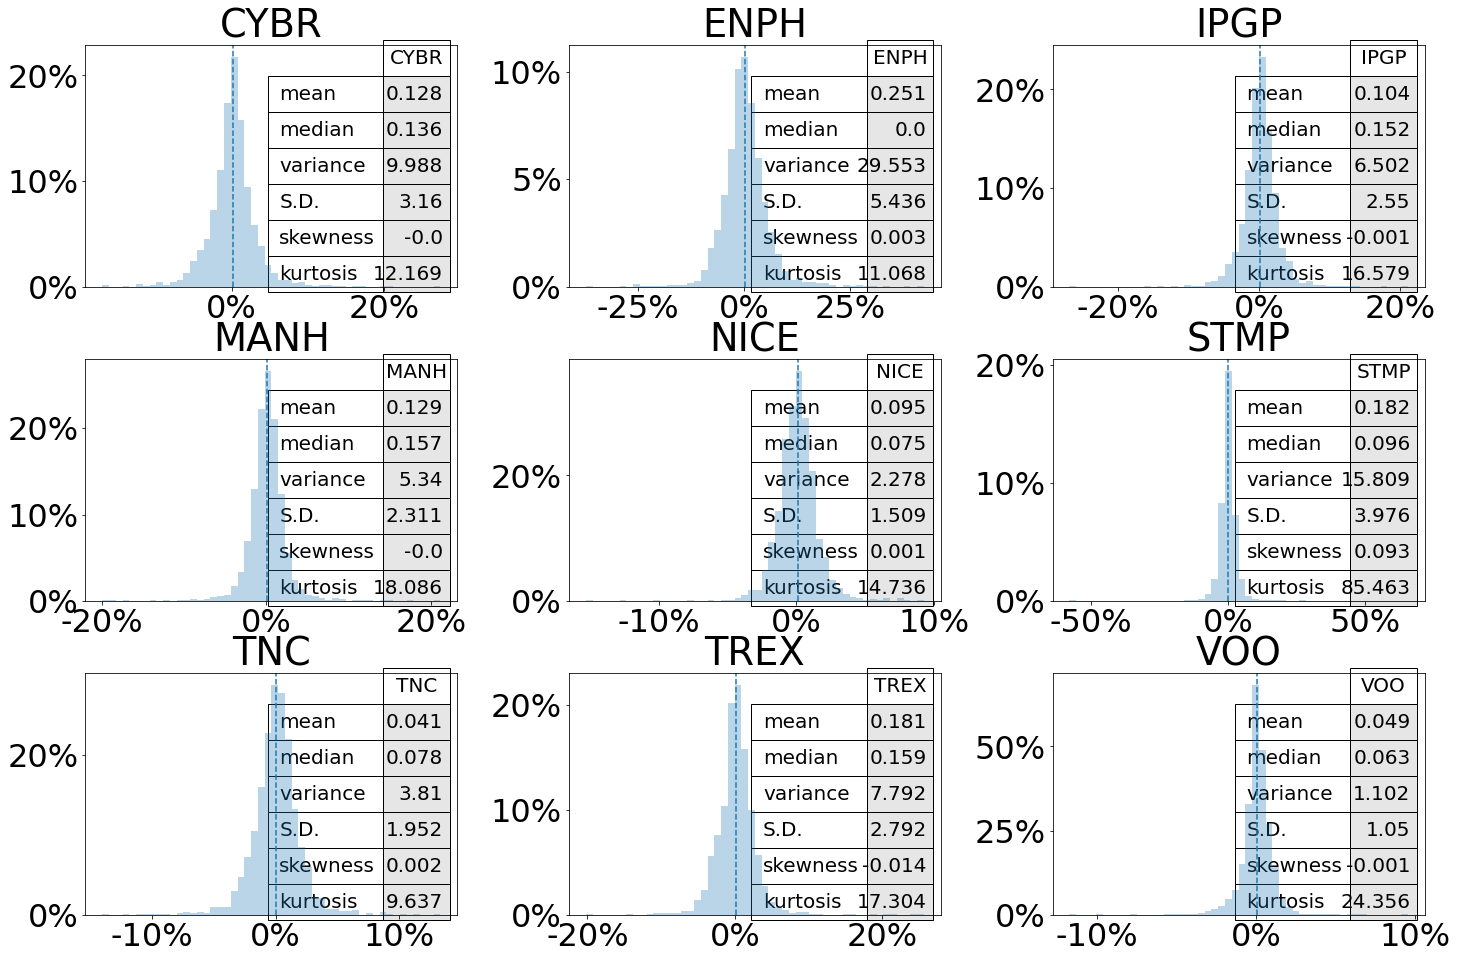

In [20]:
# importing data templates
from pandas.plotting import table

fig, ax = plt.subplots(3,3, figsize = (24,16))
price_change_data.hist(bins = 50, alpha = .3, label = price_change_data.keys(), ax = ax, density = True)

# organizing our data to be shown in one image
for i in range(len(ax)):
    for j in range(len(ax[i])):
        a = ax[i][j]
        stock = a.get_title()
        hist_data = stats_df[stock]
        # Demensions of our images
        stats =table(a, hist_data, colWidths=[.1], cellColours=[[(.9,.9,.9)]]*6, loc = "center right")
        # Size of images
        stats.scale(1.8,3)
        stats.auto_set_font_size(False)
        stats.set_fontsize(20)
         # mark the mean
        a.axvline(x = hist_data.loc["mean"], ls="--")
        # set horizontal axis values as percent
        x_vals = a.get_xticks()
        a.set_xticklabels([str(int(x))+ "%" for x in x_vals])   
        y_vals = a.get_yticks()
        a.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
        # Turn off grid lines
        a.grid(False)

   
plt.show()

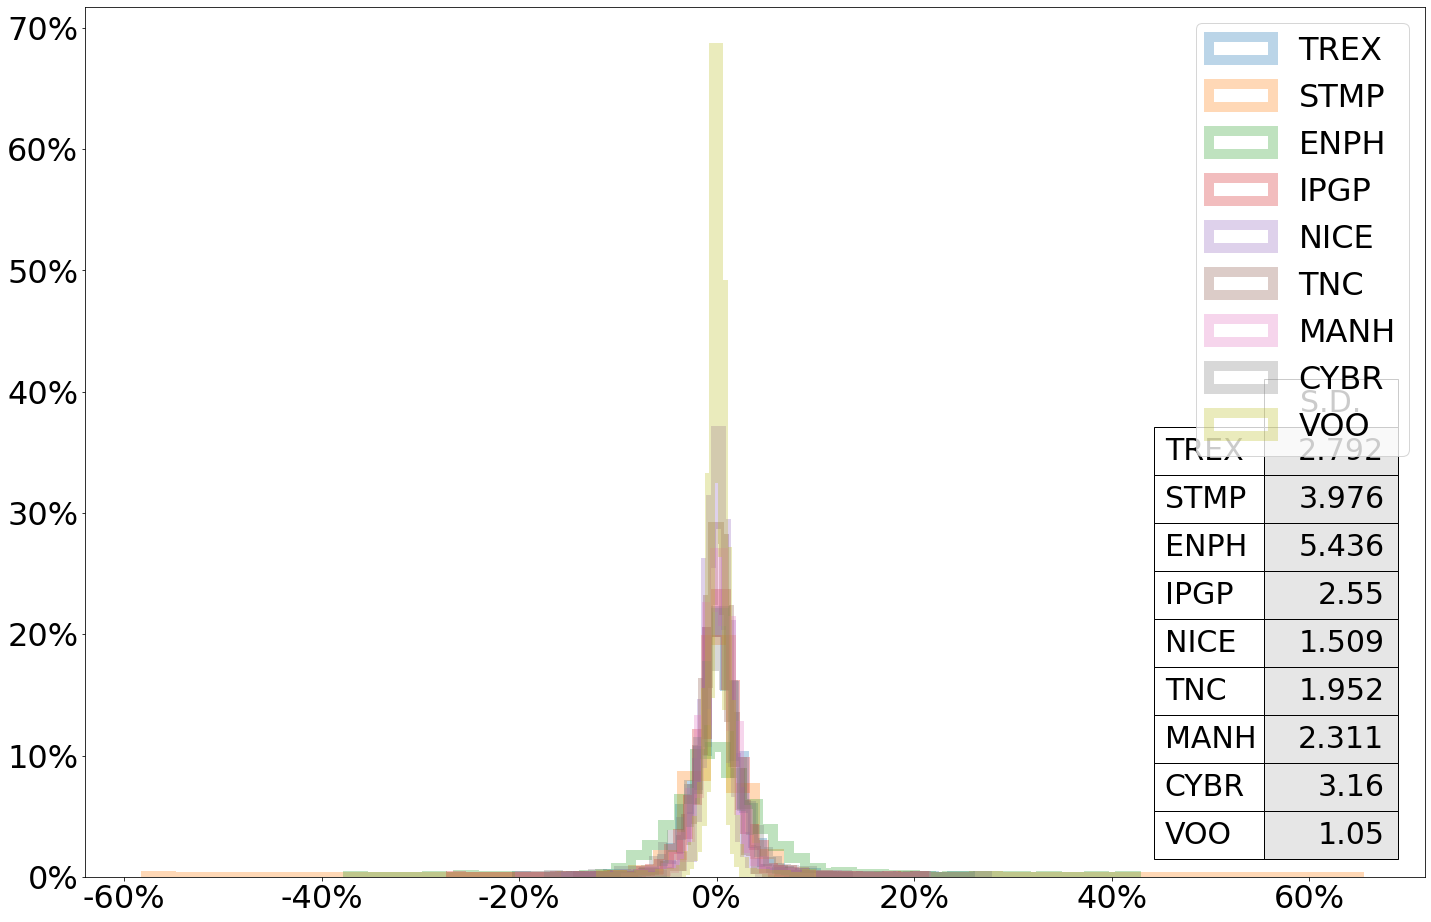

In [38]:
fig, ax = plt.subplots(figsize = (24,16))
for key in price_change_data:
    price_change_data[key].hist(bins = 50, histtype = "step", alpha = .3, label = key, linewidth = 10, density = True)
    
x_vals = ax.get_xticks()
# set vertical axis values as percent
ax.set_xticklabels([str(int(x))+ "%" for x in x_vals])    
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y * 100))+ "%" for y in y_vals]) 
# Include a table with the standard deviation of each stock
stats =table(ax, stats_df.loc["S.D."], colWidths=[.1], cellColours=[[(.9,.9,.9)]]*9, loc = "lower right")
# stats scale (x, y) rescales dimension x and y in table
stats.scale(1,4)
stats.auto_set_font_size(False)
stats.set_fontsize(30)
ax.grid(False)

plt.legend()

The height and standard deviation of each distribution suggests that the order of stocks in terms of volatility, from least to most, are VOO, NICE, TNC, MANH, IPGP, TREX, CYBR, STMP, AND ENPH. This could be due to enph being in a more volitile sector and having more risk underlying its niche products. "They sell microinverters." It also makes since that VOO would have the least amount of volatility due to it being an ETF. I am sure there ar more variables to explain each one distribution, age, size, roic, sector, and others to think of a few. However it is to be noted that the 2 highest returning holdings had the largest volatility. WOuld you be willing to take on more volatiliy for larger returns? 